In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fonte dataset: https://archive.ics.uci.edu/ml/index.php

Boston housing dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [107]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                      sep="\s+",
                      names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
                             "PRATIO", "B", "LSTAT", "MEDV"])
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# **Test con una sola colonna**

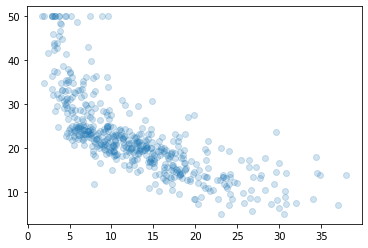

In [108]:
# la percentuale di abitanti con un basso livello di istruzione
x_0 = df[["LSTAT"]].values
# valore medio delle case abitate
y = df["MEDV"].values

plt.scatter(x_0, y, alpha = 0.2)
plt.show()

## **Split dei dati**

In [109]:
from sklearn.model_selection import train_test_split

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y, test_size=0.3, random_state=42)

## **Test del Polinomio**

Osserviamo come si comporta la regressione polinominale al variare del grado del polinomio.

In genere si parte dal grado 1 della regressione lineare fino al decimo grado.

L'elevazione a potenza è un'operazione che "devia" molto velocemente verso valori molto grandi o molto piccoli a seconda della scala. Per questo motivo è spesso una buona idea eseguire una standardizzazione dei valori del del dataset. 

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def test_poly(x_train, x_test, y_train, y_test, n):
  for n in range(1, n):
    # [1] generatore di feature polinominali
    polyfeatures = PolynomialFeatures(degree=n)
    x_train_poly = polyfeatures.fit_transform(x_train)
    x_test_poly = polyfeatures.transform(x_test)


    # [2] stnadardizzazione del set di training e del set di test
    scaler = StandardScaler()
    x_train_poly_std = scaler.fit_transform(x_train_poly)
    x_test_poly_std  = scaler.transform(x_test_poly)


    # [3] eseguo la regressione lineare 
    reg = LinearRegression()
    reg.fit(x_train_poly_std, y_train)


    # [4] calcolo la predizione sul modello addestrato 
    y_pred = reg.predict(x_test_poly_std)

    # [5] test
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print("Grado:", n, " - MSE:", mse, " - R2:", r2)


In [111]:
test_poly(x_train_0, x_test_0, y_train_0, y_test_0, 11)

Grado: 1  - MSE: 38.09870218243471  - R2: 0.4886979007906852
Grado: 2  - MSE: 31.579568441353455  - R2: 0.5761876727750417
Grado: 3  - MSE: 29.37012309041291  - R2: 0.605839445179641
Grado: 4  - MSE: 28.285391941526697  - R2: 0.6203970359040557
Grado: 5  - MSE: 27.536303987203155  - R2: 0.6304501406451044
Grado: 6  - MSE: 27.369272087837377  - R2: 0.6326917855276961
Grado: 7  - MSE: 27.96073797417634  - R2: 0.6247540414059229
Grado: 8  - MSE: 27.87017187360138  - R2: 0.6259694801135052
Grado: 9  - MSE: 27.60448149370079  - R2: 0.6295351671632212
Grado: 10  - MSE: 29.132307833705728  - R2: 0.6090310352604822


Dal test é evidente che il risultato migiora 

# **Test dell'intero dataset**

In [112]:
x_all = df.drop("MEDV", axis=1).values
y = df["MEDV"].values




## **Split dei dati**

In [113]:
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y, test_size=0.3, random_state=42)


## **Test del Polinomio**



In [114]:
test_poly(x_train_all, x_test_all, y_train_all, y_test_all, 5)

Grado: 1  - MSE: 21.517444231177286  - R2: 0.7112260057484923
Grado: 2  - MSE: 25.257540307735272  - R2: 0.6610321968877197
Grado: 3  - MSE: 2996.6781744925047  - R2: -39.21679882783973
Grado: 4  - MSE: 575.0874634855782  - R2: -6.717938157082531


Il risultato del test ci dice che la regressione polinominale, applicata all'intero dataset da risultati che vanno degradando con l'aumentare dell'esponente. 

Questo è un tipico esempio di **overfitting**, problema che ricorre spesso in un dataset composto da tante feature. Se guardiamo al risultato del polinomio di grado 2 il modello sembra dare un buon risultato, almeno fino a quel punto. Il coefficiente di determinazione (r2), ad esempio, assume immediatemente dopo  valori negativi e per di più molto al di sotto di -1.




# **Regolarizzazione**

Non è possibile stabilire a priori oltre quale grado del polinomio il modello degenera, ne agire in qualche modo sulle feature.

Una soluzione al problema inteviene direttamente sulla funzione di costo, cercando di regolarizzare i valori in uscita.

La **regolarizzazione** avviene in pratica aggiungendo un nuovo termine.

\begin{align}
  loss(a, b) + \lambda R(a)
\end{align}
Dove:
- **$R(a)$**: è la funzione di regolarizzazione
- **$\lambda$**: lambda è un nuovo iperparametro che definisce "il peso" con cui la funzione di regolarizzazione deve influire sulla funzione di costo.
  - $\lambda = 0$: si annulla la regolarizzazione.
  - $ 0.0001 <= \lambda <= 10 $: è il range ottimale all'interno del quale trovare il valore da assegnare a questo iperparametro.
  - $\lambda > 10$: un valore molto alto tende a mandare il modello in **underfitting** con coefficienti vicino allo 0.

Due delle funziondi di regolarizzazione più usate sono la **L1** e la **L2** e lavorano insieme agli algoritmi di ottimizzazione con cui è implementata la funzione di costo.

- **Regolarizzazione L1**: è la somma dei valori assoluti dei coefficienti **$a$**. 
In pratica seleziona solo le proprietà del datase più importanti riducendo a 0 i coefficienti che pur essendo poco influenti tendono a condizionare la funzione di costo.

\begin{align}
   \lambda \sum_{i=1}^n |a_i|
\end{align}


- **Regolarizzazione L2**:
 è la somma dei coefficienti **$a$** elevati al quadrato. Stabilizza il comportamento della funzione di costo penalizzando i valori molto alti e uniformando la distribuzione del dataset.
\begin{align}
   \lambda \sum_{i=1}^n a^2
\end{align}


## **sklearn**

La libreria ha due moduli per la regolarizzazione:

- **Lasso Regression (Least Absolute Shrinkage Selection Operator)**: per la regolarizzazione L1
- **Ridge Regression**: per la regolarizzazione L2

Implementa inoltre la possibilità di combinare i due metodi con il modulo **ElasticNet**.

Cominciamo ripartendo dai dati e arriviamo al punto in cui si verifica il problema.

In [115]:
X = df.drop("MEDV", axis=1).values
Y = df["MEDV"].values

# [1]
# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)


# [1]
# generazione delle feature dal grado del poloinomio di grado 3
# da cui comincia l'errore generato dall'overfitting
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# [2]
# standardizzazione delle feature polinominali
scaler = StandardScaler()
X_train_poly_std = scaler.fit_transform(X_train_poly)
X_test_poly_std  = scaler.transform(X_test_poly)

# [3]
# regressione lineare multipla
lreg = LinearRegression()
lreg.fit(X_train_poly_std, Y_train)


# [4]
# test predizione.
Y_pred_reg = lreg.predict(X_test_poly_std)


# [5]
# risultati test
mse_all = mean_squared_error(Y_test, Y_pred_reg)
r2_all  = r2_score(Y_test, Y_pred_reg)
print(" MSE:", mse_all, "  R2:", r2_all) # in overfitting


 MSE: 11703.304270568247   R2: -125.96148346687079


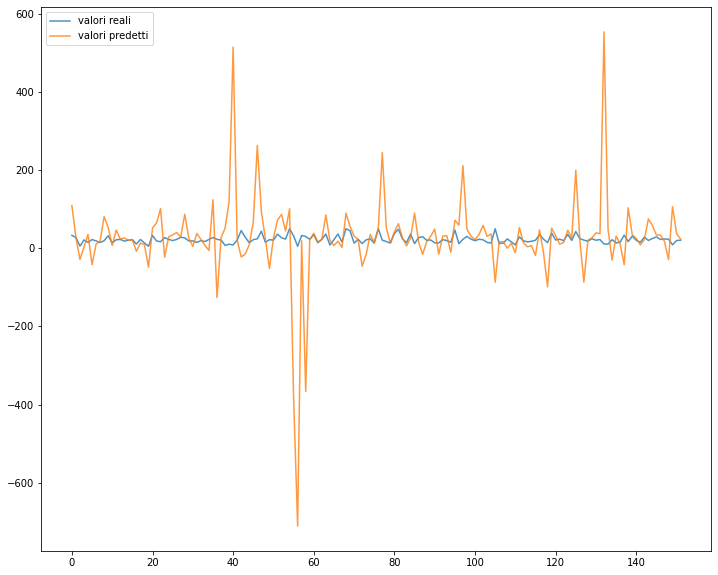

In [116]:
# andamento valori reali e valori predetti
plt.figure(figsize=(12, 10))
plt.plot(np.arange(Y_test.size), Y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(Y_pred_reg.size), Y_pred_reg, alpha=0.8, label="valori predetti")
plt.legend()
plt.show()


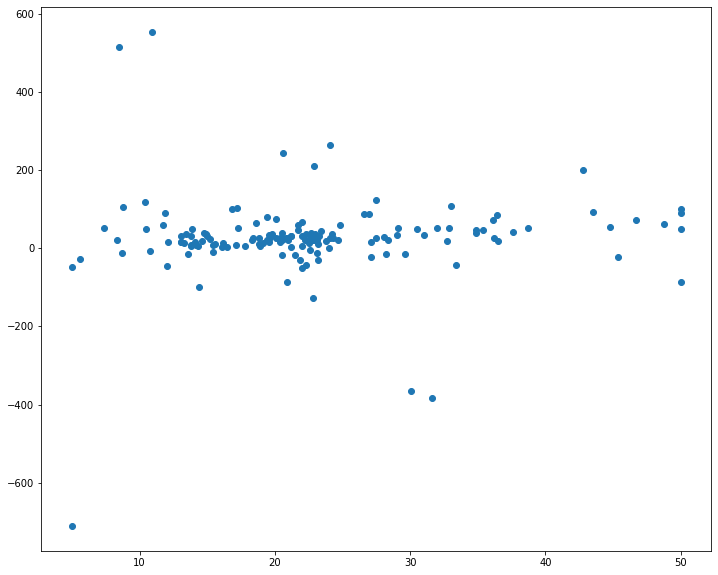

In [117]:
# varianza tra valori reali e valori predetti
plt.figure(figsize=(12, 10))
plt.scatter(Y_test, Y_pred_reg)
plt.show()

## **Scelta dell'iperparametro $\lambda$**

Attenzione, in skleran la variabile **lambda** viene chiamata **alpha**.

In [118]:
# testiamo dei valori che coprono il range scalando i decimali
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1., 10.]

## **Lasso Regression (L1)**

In [119]:
from sklearn.linear_model import  Lasso


for alpha in alpha_values:
    # [3] lasso regression
    model = Lasso(alpha=alpha)
    model.fit(X_train_poly_std, Y_train)

     # [4]
     # test predizione
    Y_pred_lasso = model.predict(X_test_poly_std)

    # [5]
    # risultati test
    mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
    r2_lasso = r2_score(Y_test, Y_pred_lasso)
    print(" MSE:", mse_lasso, "  R2:", r2_lasso)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.476e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.229e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


 MSE: 18.257750879280028   R2: 0.8019336178218148
 MSE: 15.079450152158687   R2: 0.8364129209220466
 MSE: 10.23375727619468   R2: 0.8889806694599017
 MSE: 11.953011433548596   R2: 0.8703296070566819
 MSE: 19.100207088500934   R2: 0.7927943621376277
 MSE: 92.2020720754774   R2: -0.00023989625398068704


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+01, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Il modello tende a migliorare fino ad alpha=0.01 poi comincia a degradare.
Questo perchè quando alpha cresce, con la funzione L1 cominciano ad essere ignorate alcune propietà.

## **Ridge Regression (L2)**

In [120]:
from sklearn.linear_model import Ridge

for alpha in alpha_values:
    # [3] ridge regression
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly_std, Y_train)

     # [4]
     # test predizione.
    Y_pred_ridge = model.predict(X_test_poly_std)

    # [5]
    # risultati test
    mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
    r2_ridge = r2_score(Y_test, Y_pred_ridge)
    print(" MSE:", mse_ridge, "  R2:", r2_ridge)


 MSE: 184.51331577817822   R2: -1.0016641239945514
 MSE: 49.99729450746104   R2: 0.45761209541815373
 MSE: 25.46260557229015   R2: 0.7237728677601234
 MSE: 15.68177847914214   R2: 0.8298786553710558
 MSE: 11.206560698456844   R2: 0.8784273622266057
 MSE: 10.240505693312503   R2: 0.8889074603021696


Il modello tende a migliorare definitivamente con l'aumentare di alpha.

## **ELastic Net (L1 + L2)**

IL modulo di sklearn usa il parametro **l1_ratio** per stabilire a quale modello dare priorità maggiore.

es. per **l1_ratio = 0.5**, L1 e L2 hanno lo stesso peso


In [121]:
from sklearn.linear_model import ElasticNet

for alpha in alpha_values:
    # [3] ridge regression
    model = ElasticNet(alpha=alpha)
    model.fit(X_train_poly_std, Y_train)

    # [4]
    # test predizione.
    Y_pred_elastic = model.predict(X_test_poly_std)

    # [5]
    # risultati test
    mse_elastic = mean_squared_error(Y_test, Y_pred_elastic)
    r2_elastic  = r2_score(Y_test, Y_pred_elastic)
    print(" MSE:", mse_elastic, "  R2:", r2_elastic)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.620e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.711e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


 MSE: 17.940892666466258   R2: 0.8053710050602776
 MSE: 13.841321280174105   R2: 0.8498445701961446
 MSE: 10.0950683357775   R2: 0.8904852149462645
 MSE: 11.939901080809065   R2: 0.870471832687504
 MSE: 19.508353653781157   R2: 0.7883666473485488
 MSE: 75.31698600782204   R2: 0.1829353443493491


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.934e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+02, tolerance: 2.870e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# **Pipeline e ottimizzazione degli iperparametri**

Usare ogni volta un'iterazione per cercare il valore di lambda (alpha per sklearn) giusto non è una soluzione ottimale. Inoltre non è l'unico valore settabile per la classe ***RidgeRegression***. 

Abbiamo infatti:
- ***alpha***: il valore lambda usato nella funzione di regolarizzazione
- ***normalize***: applica una normalizzazione dei parametri scalandoli in un range tra 0 e 1
- ***fit_intercept***: calcola l'intercepta.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**Grid Search** è uno dei metodi più usati per effettuare questo tipo di ricerca nel migliore dei modi. 
L'implementazione di **sklearn**,  in particolare, si associa ad un'altro concetto, molto ricorrente nelle librerie di M.L.: la pipeline.

In breve un **Pipeline** non è altro che un modo di raccogliere tutti gli stage fondamentali di un progetto di M.L. In un unico modulo. 



In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# [1] scaler
slc_test = StandardScaler()
# [2] generazione delle feature da polinomio di terzo grado
poly_test = PolynomialFeatures()
# [3] ridge regression
ridge_test = Ridge()




# ================
# [4] PIPELINE
# ================
pipe_test = Pipeline(steps=[ ("slc_test", slc_test),
                             ("poly_test", poly_test),
                             ("ridge_test", ridge_test)] )





# ===================
# [5] GRID SEARCH
# ===================
ridge_test_parameters = {'poly_test__degree':[3],
                         'ridge_test__alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.], 
                         'ridge_test__fit_intercept': [True, False]}

grid_search = GridSearchCV(pipe_test, ridge_test_parameters)
grid_search.fit(X_train, Y_train)

print("MIGLIOR SCORE: ", grid_search.best_score_)
print("I MIGLIORI IPERPARAMETRI: ", grid_search.best_params_)




MIGLIOR SCORE:  0.42582800481925015
I MIGLIORI IPERPARAMETRI:  {'poly_test__degree': 3, 'ridge_test__alpha': 10.0, 'ridge_test__fit_intercept': True}


In [123]:

poly_degree         = grid_search.best_params_['poly_test__degree']
ridge_alpha         = grid_search.best_params_['ridge_test__alpha']
ridge_fit_intercept = grid_search.best_params_['ridge_test__fit_intercept']



# =====================
# [6] ADDESTRAMENTO
# =====================
slc   = StandardScaler()
poly  = PolynomialFeatures(degree=poly_degree)
ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_fit_intercept)

pipe = Pipeline(steps=[ ("slc", slc),
                        ("poly", poly),
                        ("ridge", ridge)] )

pipe.fit(X_train, Y_train)


Y_pipe_pred = pipe.predict(X_test)




mse_pipe = mean_squared_error(Y_test, Y_pipe_pred)
r2_pipe = r2_score(Y_test, Y_pipe_pred)
print(" MSE:", mse_pipe, "  R2:", r2_pipe)



 MSE: 13.987951085494261   R2: 0.8482538794669697


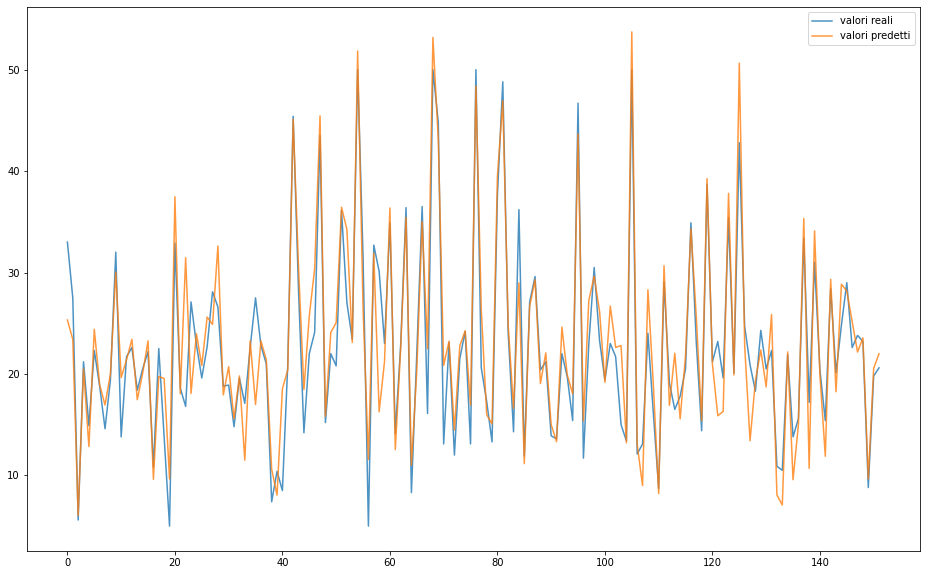

In [124]:
# andamento valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.plot(np.arange(Y_test.size), Y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(Y_pipe_pred.size), Y_pipe_pred, alpha=0.8, label="valori predetti")
plt.legend()
plt.show()


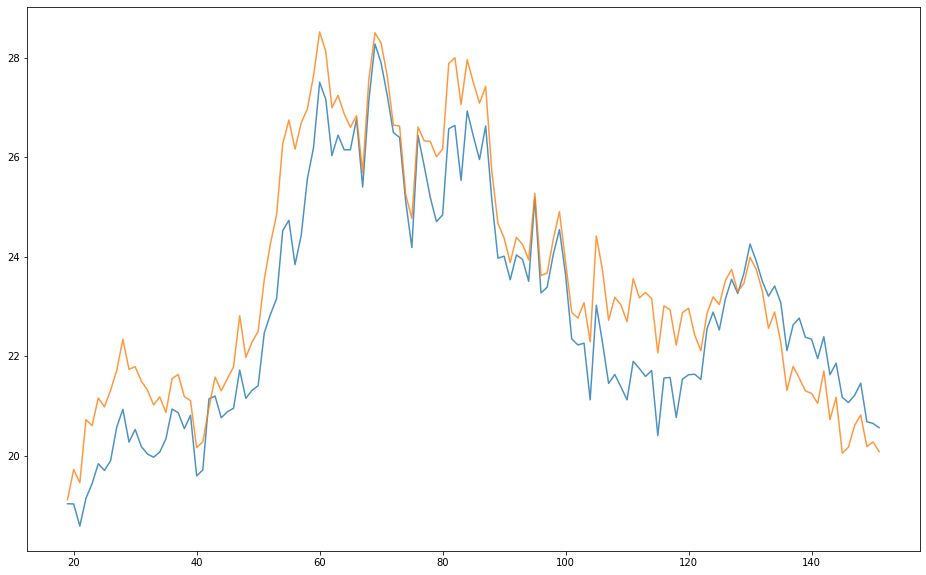

In [125]:
# andamento media mobile valori reali e valori predetti
r = 20
maverage_y_test = pd.Series(Y_test).rolling(r).mean() 
maverage_y_pred = pd.Series(Y_pipe_pred).rolling(r).mean() 

plt.figure(figsize=(16, 10))
plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
plt.show()

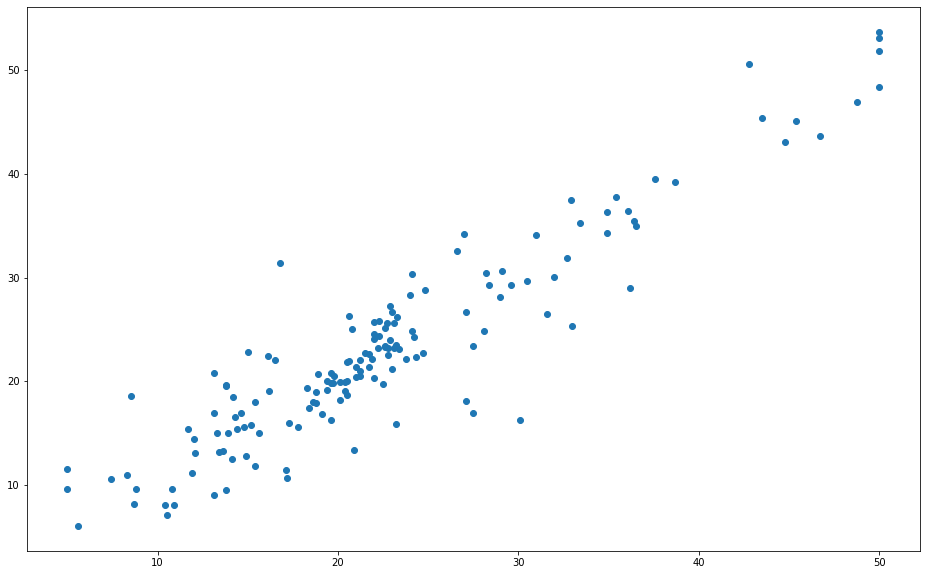

In [126]:
# varianza tra valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.scatter(Y_test, Y_pipe_pred)
plt.show()